 Phase 1: Imports, the usual ones in neural network applications

In [1]:
# pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

 Load the data in pandas, and inspect its features

In [2]:
df = pd.read_csv("Android apps Excel.csv")

C:\Users\cbala\AppData\Local\Temp\ipykernel_1572\1065889584.py:1: DtypeWarning: Columns (21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Android apps Excel.csv")


In [3]:
df.describe()

,purchases,ads,sharesinfo,shareslocation,unrestrictedinternet,usersinteract,game,Parentalguidance,Downloads,FuzzyMatched,SystemApp,paidapp
count,37955.000000,37817.000000,37817.000000,37955.000000,37817.000000,37955.000000,50217.000000,47156.000000,4.081600e+04,50217.000000,50217.000000,46309.000000
mean,0.382427,0.508634,0.026919,0.028876,0.008303,0.158345,0.221220,0.024069,4.006063e+06,0.002927,0.023159,0.039107
std,0.485986,0.499932,0.161849,0.167461,0.090744,0.365069,0.415072,0.153265,3.638331e+07,0.054026,0.150411,0.193851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+04,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+06,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+09,1.000000,1.000000,1.000000


In [4]:
df.head()

,appname,fancyname,category,company,extrainfo,source,purchases,ads,sharesinfo,shareslocation,...,price,secondprice,paidapp,rating,numberreviews,five,four,three,two,one
0,comnetflixmediaclient,Netflix,entertainment,"netflix, inc.","offers in-app purchases \ august 19, 2019 \ va...",google play,1.0,0.0,0.0,0.0,...,free,NaN,0.0,4.5,7287852,100,13,4,2,9
1,comfacebookorca,Messenger and Text and Video Chat for Free,communication,facebook,"offers in-app purchases \ august 20, 2019 \ va...",google play,1.0,0.0,0.0,1.0,...,free,NaN,0.0,4.2,69050158,100,15,9,4,15
2,comandroidchrome,Google Chrome: Fast & Secure,communication,google llc,"august 14, 2019 \ varies with device \ 5,000,0...",google play,0.0,0.0,0.0,0.0,...,free,NaN,0.0,4.3,17065648,100,18,9,4,10
3,comgoogleandroidgm,Gmail,communication,google llc,"contains ads \ august 19, 2019 \ varies with d...",google play,0.0,1.0,0.0,0.0,...,free,NaN,0.0,4.4,6272191,100,16,7,3,9
4,comgrindrappandroid,Grindr - Gay chat,social,grindr llc,contains ads and offers in-app purchases \ aug...,google play,1.0,1.0,0.0,0.0,...,free,NaN,0.0,3.5,365432,100,21,17,12,53


Always check first: do we have duplicates and do we have missing values?

In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

appname                     0
fancyname                   3
category                    2
company                     2
extrainfo                   2
source                      0
purchases               12262
ads                     12400
sharesinfo              12400
shareslocation          12262
unrestrictedinternet    12400
usersinteract           12262
game                        0
age_rating                  0
Parentalguidance         3061
Downloads                9401
FuzzyMatched                0
basename                    0
SystemApp                   0
New.category                0
categorygame                0
low_price_item          33891
top_price_item          33891
price                     318
secondprice             46540
paidapp                  3908
rating                    318
numberreviews             318
five                      318
four                      318
three                     318
two                       318
one                       318
dtype: int

In [7]:
#we are going to remove rows containing missing values
df.dropna(inplace=True)

<Axes: >

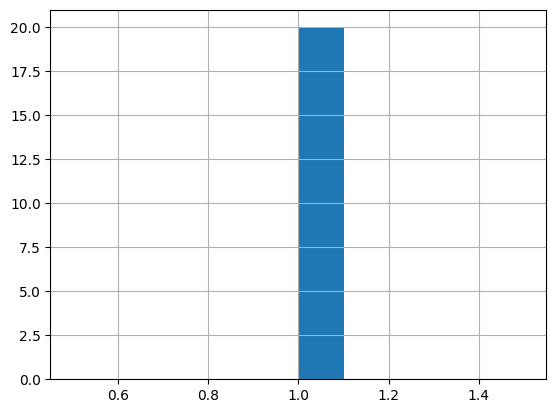

In [8]:
# it seems the data is more or less following
# a standard normal distribution
df['purchases'].hist()

 Typically the data processing phase is a lot longer, in this case there's really not that much to fix.
 
Therefore the data seems to be good to go

In [9]:
# check our columns (for easy copy-paste for the X/y -division later)
df.columns

Index(['appname', 'fancyname', 'category', 'company', 'extrainfo', 'source',
       'purchases', 'ads', 'sharesinfo', 'shareslocation',
       'unrestrictedinternet', 'usersinteract', 'game', 'age_rating',
       'Parentalguidance', 'Downloads', 'FuzzyMatched', 'basename',
       'SystemApp', 'New.category', 'categorygame', 'low_price_item',
       'top_price_item', 'price', 'secondprice', 'paidapp', 'rating',
       'numberreviews', 'five', 'four', 'three', 'two', 'one'],
      dtype='object')

In [10]:
df.head() 

,appname,fancyname,category,company,extrainfo,source,purchases,ads,sharesinfo,shareslocation,...,price,secondprice,paidapp,rating,numberreviews,five,four,three,two,one
375,com.playsportgames.mmm3,Motorsport Manager Mobile 3,racing,playsport games,offers in-app purchases \ eligible if bought a...,google play,1.0,0.0,0.0,0.0,...,4.49,0.69,1.0,4.6,16801,100,18,5,1,5
9210,com.doubleTwist.androidPlayerPro,doubleTwist Pro music player (FLAC/ALAC & Gapl...,music & audio,doubletwist �,offers in-app purchases \ eligible if bought a...,google play,1.0,0.0,0.0,0.0,...,7.99,5.59,1.0,4.2,"1,69",100,34,11,3,14
10904,com.atanusanyal.six,Six - Icon Pack,personalization,atanu sanyal,offers in-app purchases \ eligible if bought a...,google play,1.0,0.0,0.0,0.0,...,0.69,free,1.0,4.6,337,100,16,6,1,5
10908,com.eatos.uxux.black,Delux Black - Icon Pack,personalization,eatos,offers in-app purchases \ eligible if bought a...,google play,1.0,0.0,0.0,0.0,...,1.69,0.59,1.0,4.6,32,100,25,4,0,4
10937,com.benx9.luxdark,Lux Dark - Icon Pack,personalization,benas dzimidas,offers in-app purchases \ eligible if bought a...,google play,1.0,0.0,0.0,0.0,...,1.99,1.19,1.0,4.7,124,100,12,2,0,2


In [11]:
 # if you have more than one independent variables, list them all here
# leave out the target variable! (dependent variable)
X = df[['Downloads','five', 'four', 'three', 'two', 'one', 'low_price_item','top_price_item', 'rating','numberreviews']]

# have only the target variable here (dependent variable)
y = df['purchases']

In [12]:
# a nice trick to get all 6 variables for our neural network
# first split 70% for training data, and save the last 30% for temporary variables
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=101)

# then split again the temporary variables by 50% (so if it was 30% originally => now it's
# 15%/15% (because 30% * 50% = 15%))

# so after this, we have 70% for training, 15% testing, and 15% validation
# => 100% in total
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=101)

In [13]:
df.describe()

,purchases,ads,sharesinfo,shareslocation,unrestrictedinternet,usersinteract,game,Parentalguidance,Downloads,FuzzyMatched,SystemApp,paidapp
count,20.0,20.00000,20.0,20.0,20.0,20.000000,20.00000,20.0,20.000000,20.0,20.0,20.0
mean,1.0,0.35000,0.0,0.0,0.0,0.150000,0.65000,0.0,202825.000000,0.0,0.0,1.0
std,0.0,0.48936,0.0,0.0,0.0,0.366348,0.48936,0.0,322222.270254,0.0,0.0,0.0
min,1.0,0.00000,0.0,0.0,0.0,0.000000,0.00000,0.0,500.000000,0.0,0.0,1.0
25%,1.0,0.00000,0.0,0.0,0.0,0.000000,0.00000,0.0,8750.000000,0.0,0.0,1.0
50%,1.0,0.00000,0.0,0.0,0.0,0.000000,1.00000,0.0,50000.000000,0.0,0.0,1.0
75%,1.0,1.00000,0.0,0.0,0.0,0.000000,1.00000,0.0,200000.000000,0.0,0.0,1.0
max,1.0,1.00000,0.0,0.0,0.0,1.000000,1.00000,0.0,1000000.000000,0.0,0.0,1.0


In [14]:
df.columns

Index(['appname', 'fancyname', 'category', 'company', 'extrainfo', 'source',
       'purchases', 'ads', 'sharesinfo', 'shareslocation',
       'unrestrictedinternet', 'usersinteract', 'game', 'age_rating',
       'Parentalguidance', 'Downloads', 'FuzzyMatched', 'basename',
       'SystemApp', 'New.category', 'categorygame', 'low_price_item',
       'top_price_item', 'price', 'secondprice', 'paidapp', 'rating',
       'numberreviews', 'five', 'four', 'three', 'two', 'one'],
      dtype='object')

In [15]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=101)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=101)

Build our neural network

In [16]:
# 10 variables in this case for training
training_variable_amount = len(X.columns)
from keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('best_model.keras', monitor='val_loss', mode='min', save_best_only=True)

callback_list = [mc]

# create the structure of our neural network
model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(training_variable_amount,)),
        layers.Dense(12, activation="relu", kernel_regularizer=keras.regularizers.l2(l=0.1)),
        #layers.Dense(12, activation="relu", input_shape=(training_variable_amount,)),
        #layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        #layers.Dropout(0.2),
        layers.Dense(8, activation="relu"),
        layers.Dense(8, activation="relu"),
        #layers.Dropout(0.1),
        layers.Dense(4, activation="relu"),
        layers.Dense(1)
    ]
)

# compile the neural network, use adam (most common one) as the optimizer
# and mean square error (mse) for the loss function (most common for regression problems)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.002), loss='mse')
# show a quick recap of our structure
model.summary()
# start training 
model.fit(x=X_train, y=y_train, epochs=2000, validation_data=(X_val, y_val), callbacks=callback_list)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 10)                40        
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 12)                132       
                                                                 
 dense_1 (Dense)             (None, 16)                208       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                       

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).